In [2]:

path ='G:/Shared drives/BeStarsMiMeS/ScienceFiles/' 
pdf_path ='G:/Shared drives/BeStarsMiMeS/ScienceFiles/05-RavenSetup/'


## 0.1 Importing Packages

In [3]:
import pandas as pd
from IPython.display import display
import pyRaven as rav 
import matplotlib.pyplot as plt
import h5py as h5    
import pandas as pd
import itertools
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
#Accessing the google sheets

sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)
StarData_NoNa = StarData.dropna(subset=['vsini-estimate']) #New sheet without the rows in vsini with 'very bad'

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [5]:
StarData_Index = StarData_NoNa.reset_index() #Adds a new index for StarData to make a for loop continuous and excludes rows that do not have an 'vsini-estimated' column

In [6]:
StarData

,HD,Name,Nobs,T,log(g),ModelCode,Adopted-vsini,Halpha shape,Notes,vsini-estimate,SB-flag,SB9 catalog,pyRavenFlag,Asif Hybrid Over/Underfill,i_min [deg],Other Notes,JonNotes,Unnamed: 17
0,NaN,hd6226,1,15000,4.0,T15000g40,120.00,absorption,"no disk during observation, rotational modulat...",90.0,NaN,NaN,1.0,under,10.369760,NaN,Definitely classical Be. Line profile weirdnes...,NaN
1,7636.0,hd7636,2,15000,4.0,T15000g40,220.00,asymetric single,binary? no tess observation,150.0,NaN,NaN,2.0,under,17.457603,NaN,Definitely classical Be. LPVs probably from pu...,NaN
2,10144.0,hd10144,1,20000,3.5,T20000g35,245.31,bowl,binary or pulsator,245.0,NaN,NaN,1.0,over,29.340582,NaN,Achernar! Brightest Be star in the sky. Nice a...,NaN
3,10516.0,hd10516,1,25000,4.0,T25000g40,382.04,asymetric double,sdO companion https://iopscience.iop.org/artic...,280.0,1.0,SB2,1.0,NaN,34.055798,NaN,"phi Per, classical Be. The strong asymmetry in...",NaN
4,11415.0,hd11415,1,18000,4.0,T18000g40,48.00,absorption,not a binary https://iopscience.iop.org/articl...,60.0,NaN,NaN,NaN,under,6.892103,NaN,"eps Cas. Probably not be a Be star, No sign of...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,217891.0,hd217891,5,15000,3.0,T15000g30,95.00,single,not a binary https://iopscience.iop.org/articl...,120.0,NaN,NaN,1.0,NaN,13.886540,NaN,bet Psc. consistently has strong emission. Qui...,NaN
74,221507.0,hd221507,1,10500,4.0,T10500g40,40.00,absorption,Not a Be star,NaN,NaN,NaN,NaN,under,4.588566,NaN,"yeah, not a Be star. What's interesting though...",NaN
75,224686.0,hd224686,2,13000,4.0,T13000g40,286.16,shell,NaN,290.0,NaN,NaN,1.0,under,35.450543,NaN,typical late-type Be star. Shouldn't have to w...,NaN
76,239712.0,hd239712,1,21000,4.0,T21000g40,304.86,asymetric double,NaN,290.0,NaN,NaN,1.0,NaN,35.450543,NaN,distortion in He 6678 probably due to asymmetr...,NaN


In [7]:
Observations

,1,Unnamed: 1,Unnamed: 2,Name,LSDfileName,NameAsif,NameOfMask,Unnamed: 7,NameOfSymbolicLinkToData,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,185,1.0,1,hd6226,hd6226_1.lsd.s,hd6226_1,mask_T15000g40lamb3700_9000.dat,0,hd6226_11AP14_1310132pnv.s,110.34,-60.297909,-70.000000,NaN,NaN,NaN
1,193,2.0,1,hd7636,hd7636_1.lsd.s,hd7636_1,mask_T15000g40lamb3700_9000.dat,0,hd7636_11AP14_1314767pnv.s,230.00,0.000000,0.000000,NaN,NaN,NaN
2,194,2.0,2,hd7636,hd7636_2.lsd.s,hd7636_2,mask_T15000g40lamb3700_9000.dat,0,hd7636_11AP14_1316457pnv.s,230.00,0.000000,0.000000,NaN,NaN,NaN
3,2,3.0,1,hd10144,hd10144_1.lsd.s,hd10144_1,mask_T20000g35lamb3700_9000.dat,1,hd10144_187.D-0917A_2011-12-11_01_pnv.s,245.31,12.981952,12.981952,NaN,NaN,NaN
4,3,4.0,1,hd10516,hd10516_1.lsd.s,hd10516_1,mask_T25000g40lamb3700_9000.dat,0,hd10516_11AP14_1311181pnv.s,382.04,-60.990786,-60.990786,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,137,74.0,1,hd221507,hd221507_1.lsd.s,hd221507_1,mask_T10500g40lamb3700_9000.dat,1,hd221507_187.D-0917A_2012-07-19_01_pnv.s,20.00,0.000072,0.000072,NaN,NaN,NaN
197,140,75.0,1,hd224686,hd224686_1.lsd.s,hd224686_1,mask_T13000g40lamb3700_9000.dat,1,hd224686_187.D-0917A_2011-12-09_01_pnv.s,286.16,11.694301,11.694301,NaN,NaN,NaN
198,141,75.0,2,hd224686,hd224686_2.lsd.s,hd224686_2,mask_T13000g40lamb3700_9000.dat,1,hd224686_187.D-0917A_2011-12-12_01_pnv.s,286.16,8.724928,8.724928,NaN,NaN,NaN
199,145,76.0,1,hd239712,hd239712_1.lsd.s,hd239712_1,mask_T21000g40lamb3700_9000.dat,0,hd239712_11BP14_1331344pnv.s,304.86,-0.002959,-0.002959,NaN,NaN,NaN


## 1. Demo for single star
Before anything can be run through pyRaven the data for our stars must be put in a certain format. pyRaven is built to work with data packets that are saved as .h5 files. Within the pyRaven github there is a tutorial called `data_example.ipynb` which goes through the structure and creation of the data packet. Additionally, please make another multipage pdf of the output plot.

Right now we can make the data packets for the hybrid-fullMask (hybrid_maskdepth0.02_tellClean) and obs-fullMask (normalized_maskdepth0.02_tellClean). Once the `12-LSDComparisions.ipynb` is completed, check with Vero to see if any more models should be be converted to data packets.

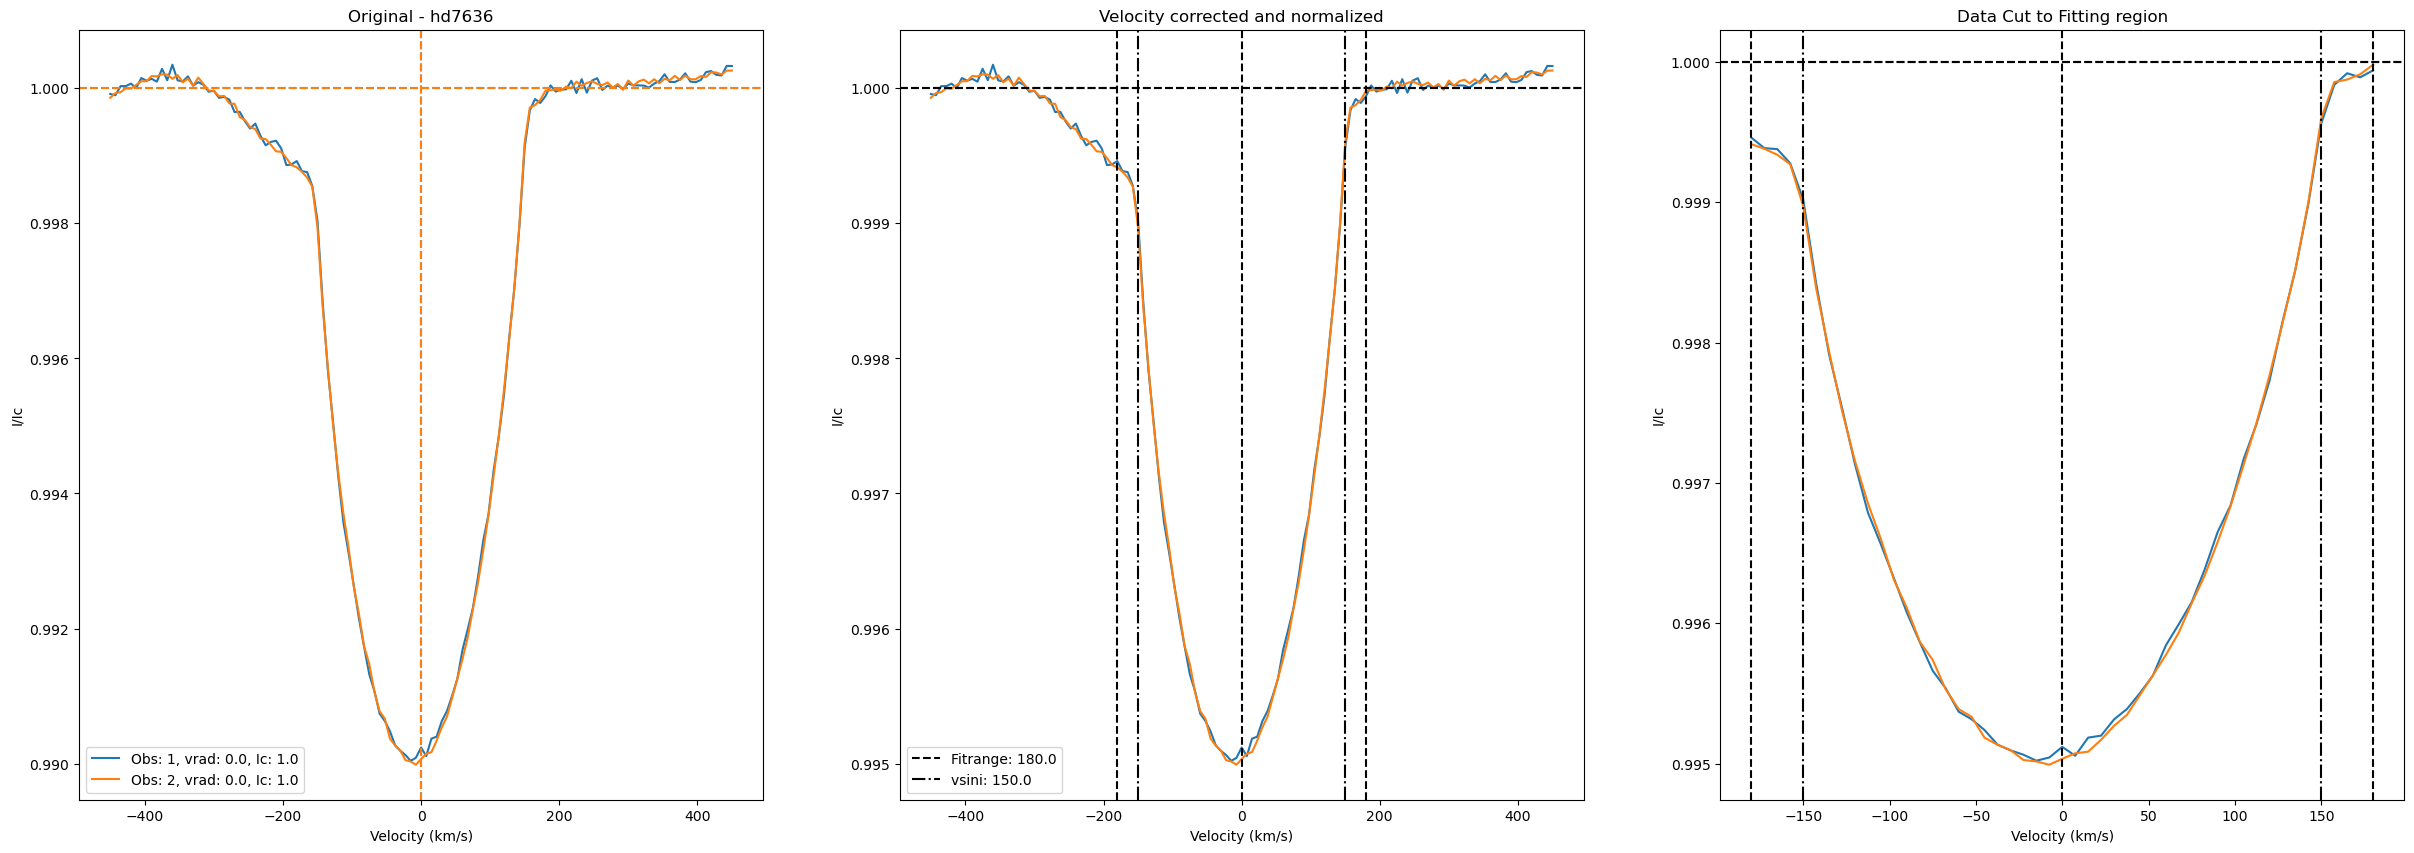

In [7]:
star_name = StarData['Name'][1] #Star name #StarData
nobs = StarData['Nobs'][1] #number of observations #StarData/Observations
fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames #Observations
vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads #Observations
Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
wint_rav = 0.1 #intesity weight for pyRaven #constant?
wpol_rav = 60.0 #polarization weight for pyRaven #constant?
fitrange = 1.2*float(StarData['vsini-estimate'][1]) #size of the area to be used in the fit (just the line, no continuum)
vsini = float(StarData['vsini-estimate'][1]) #vsini of the star in km/s #StarData
fnames =['{}03-LSD-calculations/LSD/hybrid_maskdepth0.02_tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
Packet = rav.data.create_Packet(star_name, nobs, fname, 
                    vrad, Ic, wint_data, wpol_data,
                    wint_rav, wpol_rav, fitrange, vsini,
                    lsds_original)

fig, ax = Packet.plotI()
ax[0].set_title('Original - {}'.format(star_name))

Packet.write('{}05-RavenSetup/hybrid_maskdepth0.02_tellClean/{}.h5'.format(path,star_name))

In [28]:
import h5py
def write(self, fname):
    """
    Method that writes a data packet to an h5 file.

    :param packet: DataPacket object being stored in the file
    :param fname: name of the file to be written

    :rtype: none
    """

    with h5py.File(fname,'w') as f:
        f.create_dataset('star_name', data = self.star_name)
        f.create_dataset('nobs', data = self.nobs)
        f.create_dataset('obs_names', data = self.obs_names)
        f.create_dataset('vrad', data = self.vrad)
        f.create_dataset('Ic', data = self.Ic)
        f.create_dataset('wint_data', data=self.wint_data)
        f.create_dataset('wpol_data', data=self.wpol_data)
        f.create_dataset('wint_rav', data=self.wint_data)
        f.create_dataset('wpol_rav', data=self.wpol_data)

        f.create_dataset('fitrange', data = self.fitrange)
        f.create_dataset('vsini', data = self.vsini)

        f_original = f.create_group('original')
        write2(self.original,f_original, self.obs_names)
        
        f_scaled = f.create_group('scaled') 
        write2(self.scaled, f_scaled, self.obs_names)

        f_cutfit = f.create_group('cutfit')
        write2(self.cutfit,f_cutfit, self.obs_names)

def write2(self, f, obs_names):
    """
    Helper function that writes the contents of an LSDProfs object to an h5 file

    :param f: h5 file being written
    :param lsds: LSDprofs object being stored in the file
    :param obs_names: (List of string) the IDs to be used for each observations

    :rtype: none
    """

    def write_lsd(lsd, f):
        """
        Helper function that writes the contents of an lsd_prof to an h5 file

        :param f: h5 file being written
        :param lsd: lsd_prof being stored in the file

        :rtype: none
        """
        f.create_dataset('vel', data = lsd.vel, compression="gzip", compression_opts=9)
        f.create_dataset('specI', data = lsd.specI, compression="gzip", compression_opts=9)
        f.create_dataset('specSigI', data = lsd.specSigI, compression="gzip", compression_opts=9)
        f.create_dataset('specV', data = lsd.specV, compression="gzip", compression_opts=9)
        f.create_dataset('specSigV', data = lsd.specSigV, compression="gzip", compression_opts=9)
        f.create_dataset('specN1', data = lsd.specN1, compression="gzip", compression_opts=9)
        f.create_dataset('specSigN1', data = lsd.specSigN1, compression="gzip", compression_opts=9)
        f.create_dataset('specN2', data = lsd.specN2, compression="gzip", compression_opts=9)
        f.create_dataset('specSigN2', data = lsd.specSigN2, compression="gzip", compression_opts=9)
        f.create_dataset('header', data = lsd.header)

    for i in range(0, len(self.lsds)):
        write_lsd(self.lsds[i], f.create_group(obs_names[i]))

In [33]:
star_name = StarData['Name'][1] #Star name #StarData
nobs = StarData['Nobs'][1] #number of observations #StarData/Observations
fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames #Observations
vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads #Observations
Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
wint_rav = 0.1 #intesity weight for pyRaven #constant?
wpol_rav = 60.0 #polarization weight for pyRaven #constant?
fitrange = 1.2*float(StarData['vsini-estimate'][1]) #size of the area to be used in the fit (just the line, no continuum)
vsini = float(StarData['vsini-estimate'][1]) #vsini of the star in km/s #StarData
fnames =['{}03-LSD-calculations/LSD/hybrid_maskdepth0.02_tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
Packet = rav.data.create_Packet(star_name, nobs, fname, 
                    vrad, Ic, wint_data, wpol_data,
                    wint_rav, wpol_rav, fitrange, vsini,
                    lsds_original)

Packet.write('test.h5')
write(Packet,'test2.h5')

## 2. hybrid_maskdepth0.02_tellClean

In [8]:
%%capture
with PdfPages('{}05-hybrid_maskdepth0.02_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2:
            star_name = StarData_Index['Name'][i] #Star name in StarData
            nobs = StarData_Index['Nobs'][i] #number of observations for each star in StarData
            fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames in Observation
            vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads inObservations
            Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
            wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
            wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
            wint_rav = 0.1 #intesity weight for pyRaven #constant?
            wpol_rav = 60.0 #polarization weight for pyRaven #constant?
            fitrange = 1.2*float(StarData_Index['vsini-estimate'][i]) #size of the area to be used in the fit (just the line, no continuum)
            vsini = float(StarData_Index['vsini-estimate'][i]) #vsini of the star in km/s #StarData
            fnames =['{}03-LSD-calculations/LSD/hybrid_maskdepth0.02_tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

            lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
            Packet = rav.data.create_Packet(star_name, nobs, fname, 
                                vrad, Ic, wint_data, wpol_data,
                                wint_rav, wpol_rav, fitrange, vsini,
                                lsds_original)

            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)
        
            Packet.write('{}05-RavenSetup/hybrid_maskdepth0.02_tellClean/{}.h5'.format(path,star_name))

## 3. normalized_maskdepth0.02_tellClean

In [9]:
%%capture
with PdfPages('{}05-normalized_maskdepth0.02_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2:
            star_name = StarData_Index['Name'][i] #Star name in StarData
            nobs = StarData_Index['Nobs'][i] #number of observations for each star in StarData
            fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames #Observations
            vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads #Observations
            Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
            wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
            wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
            wint_rav = 0.1 #intesity weight for pyRaven #constant?
            wpol_rav = 60.0 #polarization weight for pyRaven #constant?
            fitrange = 1.2*float(StarData_Index['vsini-estimate'][i]) #size of the area to be used in the fit (just the line, no continuum)
            vsini = float(StarData_Index['vsini-estimate'][i]) #vsini of the star in km/s #StarData
            fnames =['{}03-LSD-calculations/LSD/normalized_maskdepth0.02_tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

            lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
            Packet = rav.data.create_Packet(star_name, nobs, fname, 
                                vrad, Ic, wint_data, wpol_data,
                                wint_rav, wpol_rav, fitrange, vsini,
                                lsds_original)

            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)
        
            Packet.write('{}05-RavenSetup/normalized_maskdepth0.02_tellClean/{}.h5'.format(path,star_name))

## 4. hybrid_SuperCleanAsif+tellClean

In [10]:
%%capture
with PdfPages('{}05-hybrid_SuperCleanAsif_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2:
            star_name = StarData_Index['Name'][i] #Star name in StarData
            nobs = StarData_Index['Nobs'][i] #number of observations for each star in StarData
            fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames in Observation
            vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads inObservations
            Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
            wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
            wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
            wint_rav = 0.1 #intesity weight for pyRaven #constant?
            wpol_rav = 60.0 #polarization weight for pyRaven #constant?
            fitrange = 1.2*float(StarData_Index['vsini-estimate'][i]) #size of the area to be used in the fit (just the line, no continuum)
            vsini = float(StarData_Index['vsini-estimate'][i]) #vsini of the star in km/s #StarData
            fnames =['{}03-LSD-calculations/LSD/hybrid_SuperCleanAsif+tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

            lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
            Packet = rav.data.create_Packet(star_name, nobs, fname, 
                                vrad, Ic, wint_data, wpol_data,
                                wint_rav, wpol_rav, fitrange, vsini,
                                lsds_original)

            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)
        
            Packet.write('{}05-RavenSetup/hybrid_SuperCleanAsif_tellClean/{}.h5'.format(path,star_name))

## 5. normalized_SuperCleanAsif

In [11]:
%%capture
with PdfPages('{}05-normalized_SuperCleanAsif_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2:
            star_name = StarData_Index['Name'][i] #Star name in StarData
            nobs = StarData_Index['Nobs'][i] #number of observations for each star in StarData
            fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames in Observation
            vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads inObservations
            Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
            wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
            wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
            wint_rav = 0.1 #intesity weight for pyRaven #constant?
            wpol_rav = 60.0 #polarization weight for pyRaven #constant?
            fitrange = 1.2*float(StarData_Index['vsini-estimate'][i]) #size of the area to be used in the fit (just the line, no continuum)
            vsini = float(StarData_Index['vsini-estimate'][i]) #vsini of the star in km/s #StarData
            fnames =['{}03-LSD-calculations/LSD/normalized_SuperCleanAsif+tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

            lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
            Packet = rav.data.create_Packet(star_name, nobs, fname, 
                                vrad, Ic, wint_data, wpol_data,
                                wint_rav, wpol_rav, fitrange, vsini,
                                lsds_original)

            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)
        
            Packet.write('{}05-RavenSetup/normalized_SuperCleanAsif_tellClean/{}.h5'.format(path,star_name))

## 6. hybrid_SuperCleanAsifTweak+tellClean

In [12]:
%%capture
with PdfPages('{}05-hybrid_SuperCleanAsifTweak_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2:
            star_name = StarData_Index['Name'][i] #Star name in StarData
            nobs = StarData_Index['Nobs'][i] #number of observations for each star in StarData
            fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames in Observation
            vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads inObservations
            Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
            wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
            wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
            wint_rav = 0.1 #intesity weight for pyRaven #constant?
            wpol_rav = 60.0 #polarization weight for pyRaven #constant?
            fitrange = 1.2*float(StarData_Index['vsini-estimate'][i]) #size of the area to be used in the fit (just the line, no continuum)
            vsini = float(StarData_Index['vsini-estimate'][i]) #vsini of the star in km/s #StarData
            fnames =['{}03-LSD-calculations/LSD/hybrid_SuperCleanAsifTweak+tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

            lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
            Packet = rav.data.create_Packet(star_name, nobs, fname, 
                                vrad, Ic, wint_data, wpol_data,
                                wint_rav, wpol_rav, fitrange, vsini,
                                lsds_original)

            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)
        
            Packet.write('{}05-RavenSetup/hybrid_SuperCleanAsifTweak_tellClean/{}.h5'.format(path,star_name))

## 7. normalized_SuperCleanAsifTweak

In [13]:
%%capture
with PdfPages('{}05-normalized_SuperCleanAsifTweak_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2:
            star_name = StarData_Index['Name'][i] #Star name in StarData
            nobs = StarData_Index['Nobs'][i] #number of observations for each star in StarData
            fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames in Observation
            vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads inObservations
            Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
            wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
            wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
            wint_rav = 0.1 #intesity weight for pyRaven #constant?
            wpol_rav = 60.0 #polarization weight for pyRaven #constant?
            fitrange = 1.2*float(StarData_Index['vsini-estimate'][i]) #size of the area to be used in the fit (just the line, no continuum)
            vsini = float(StarData_Index['vsini-estimate'][i]) #vsini of the star in km/s #StarData
            fnames =['{}03-LSD-calculations/LSD/normalized_SuperCleanAsifTweak+tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

            lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
            Packet = rav.data.create_Packet(star_name, nobs, fname, 
                                vrad, Ic, wint_data, wpol_data,
                                wint_rav, wpol_rav, fitrange, vsini,
                                lsds_original)

            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)
        
            Packet.write('{}05-RavenSetup/normalized_SuperCleanAsifTweak_tellClean/{}.h5'.format(path,star_name))

## 8. hybrid_maskdepth0.01_tellClean

In [10]:
%%capture
with PdfPages('{}05-hybrid_maskdepth0.01_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==1 or StarData_Index['pyRavenFlag'][i]==2:
            star_name = StarData_Index['Name'][i] #Star name in StarData
            nobs = StarData_Index['Nobs'][i] #number of observations for each star in StarData
            fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames in Observation
            vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads inObservations
            Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
            wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
            wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
            wint_rav = 0.1 #intesity weight for pyRaven #constant?
            wpol_rav = 60.0 #polarization weight for pyRaven #constant?
            fitrange = 1.2*float(StarData_Index['vsini-estimate'][i]) #size of the area to be used in the fit (just the line, no continuum)
            vsini = float(StarData_Index['vsini-estimate'][i]) #vsini of the star in km/s #StarData
            fnames =['{}03-LSD-calculations/LSD/hybrid_maskdepth0.01_tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

            lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
            Packet = rav.data.create_Packet(star_name, nobs, fname, 
                                vrad, Ic, wint_data, wpol_data,
                                wint_rav, wpol_rav, fitrange, vsini,
                                lsds_original)

            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)
        
            Packet.write('{}05-RavenSetup/hybrid_maskdepth0.01_tellClean/{}.h5'.format(path,star_name))

## 9. hybrid_CleanAsif+tellClean

In [11]:
%%capture
with PdfPages('{}05-hybrid_CleanAsif_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2 or StarData_Index['pyRavenFlag'][i]==1:
            star_name = StarData_Index['Name'][i] #Star name in StarData
            nobs = StarData_Index['Nobs'][i] #number of observations for each star in StarData
            fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames in Observation
            vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads inObservations
            Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
            wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
            wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
            wint_rav = 0.1 #intesity weight for pyRaven #constant?
            wpol_rav = 60.0 #polarization weight for pyRaven #constant?
            fitrange = 1.2*float(StarData_Index['vsini-estimate'][i]) #size of the area to be used in the fit (just the line, no continuum)
            vsini = float(StarData_Index['vsini-estimate'][i]) #vsini of the star in km/s #StarData
            fnames =['{}03-LSD-calculations/LSD/hybrid_CleanAsif+tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

            lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
            Packet = rav.data.create_Packet(star_name, nobs, fname, 
                                vrad, Ic, wint_data, wpol_data,
                                wint_rav, wpol_rav, fitrange, vsini,
                                lsds_original)

            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)
        
            Packet.write('{}05-RavenSetup/hybrid_CleanAsif_tellClean/{}.h5'.format(path,star_name))

## 10. normalized_CleanAsif

In [8]:
%%capture
with PdfPages('{}05-normalized_CleanAsif_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2 or StarData_Index['pyRavenFlag'][i]==1:
            star_name = StarData_Index['Name'][i] #Star name in StarData
            nobs = StarData_Index['Nobs'][i] #number of observations for each star in StarData
            fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames in Observation
            vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads inObservations
            Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
            wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
            wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
            wint_rav = 0.1 #intesity weight for pyRaven #constant?
            wpol_rav = 60.0 #polarization weight for pyRaven #constant?
            fitrange = 1.2*float(StarData_Index['vsini-estimate'][i]) #size of the area to be used in the fit (just the line, no continuum)
            vsini = float(StarData_Index['vsini-estimate'][i]) #vsini of the star in km/s #StarData
            fnames =['{}03-LSD-calculations/LSD/normalized_CleanAsif+tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

            lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
            Packet = rav.data.create_Packet(star_name, nobs, fname, 
                                vrad, Ic, wint_data, wpol_data,
                                wint_rav, wpol_rav, fitrange, vsini,
                                lsds_original)

            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)
        
            Packet.write('{}05-RavenSetup/normalized_CleanAsif+tellClean/{}.h5'.format(path,star_name))

## 11. hybrid_CleanAsifTweak+tellClean

In [9]:
%%capture
with PdfPages('{}05-hybrid_CleanAsifTweak_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2 or StarData_Index['pyRavenFlag'][i]==1:
            star_name = StarData_Index['Name'][i] #Star name in StarData
            nobs = StarData_Index['Nobs'][i] #number of observations for each star in StarData
            fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames in Observation
            vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads inObservations
            Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
            wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
            wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
            wint_rav = 0.1 #intesity weight for pyRaven #constant?
            wpol_rav = 60.0 #polarization weight for pyRaven #constant?
            fitrange = 1.2*float(StarData_Index['vsini-estimate'][i]) #size of the area to be used in the fit (just the line, no continuum)
            vsini = float(StarData_Index['vsini-estimate'][i]) #vsini of the star in km/s #StarData
            fnames =['{}03-LSD-calculations/LSD/hybrid_CleanAsifTweak+tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

            lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
            Packet = rav.data.create_Packet(star_name, nobs, fname, 
                                vrad, Ic, wint_data, wpol_data,
                                wint_rav, wpol_rav, fitrange, vsini,
                                lsds_original)

            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)
        
            Packet.write('{}05-RavenSetup/hybrid_CleanAsifTweak+tellClean/{}.h5'.format(path,star_name))

## 12. normalized_CleanAsifTweak

In [10]:
%%capture
with PdfPages('{}05-normalized_CleanAsifTweak_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2 or StarData_Index['pyRavenFlag'][i]==1:
            star_name = StarData_Index['Name'][i] #Star name in StarData
            nobs = StarData_Index['Nobs'][i] #number of observations for each star in StarData
            fname = Observations[Observations['Name']==star_name]['LSDfileName'].to_numpy() #list of filenames in Observation
            vrad = Observations[Observations['Name']==star_name]['Unnamed: 11'].to_numpy() #list of vrads inObservations
            Ic = np.ones(nobs) #list of continuum normalization values (should be ~1) #LSD profile (.lsd file)
            wint_data = np.ones(nobs)*0.2 #? #intesity weight for pyRaven #constant?
            wpol_data = np.ones(nobs)*120 #? #polarization weight of data #constant?
            wint_rav = 0.1 #intesity weight for pyRaven #constant?
            wpol_rav = 60.0 #polarization weight for pyRaven #constant?
            fitrange = 1.2*float(StarData_Index['vsini-estimate'][i]) #size of the area to be used in the fit (just the line, no continuum)
            vsini = float(StarData_Index['vsini-estimate'][i]) #vsini of the star in km/s #StarData
            fnames =['{}03-LSD-calculations/LSD/normalized_CleanAsifTweak+tellClean/{}'.format(path,x.split('.s')[0]) for x in fname]

            lsds_original = rav.data.read_lsds_from_sfiles(fnames) #list of LSDs for a star, one for each observation
            Packet = rav.data.create_Packet(star_name, nobs, fname, 
                                vrad, Ic, wint_data, wpol_data,
                                wint_rav, wpol_rav, fitrange, vsini,
                                lsds_original)

            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)
        
            Packet.write('{}05-RavenSetup/normalized_CleanAsifTweak+tellClean/{}.h5'.format(path,star_name))

In [9]:
%%capture
with PdfPages('{}05-normalized_SuperCleanAsif_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2 or StarData_Index['pyRavenFlag'][i]==1:
            star_name = StarData_Index['Name'][i] #Star name in StarData


            Packet = rav.data.read_packet('{}05-RavenSetup/normalized_SuperCleanAsif_tellClean/{}.h5'.format(path,star_name))
            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)

In [10]:
%%capture
with PdfPages('{}05-hybrid_SuperCleanAsif_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2 or StarData_Index['pyRavenFlag'][i]==1:
            star_name = StarData_Index['Name'][i] #Star name in StarData


            Packet = rav.data.read_packet('{}05-RavenSetup/hybrid_SuperCleanAsif_tellClean/{}.h5'.format(path,star_name))
            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)

In [11]:

%%capture
with PdfPages('{}05-hybrid_maskdepth0.02_DataPacket.pdf'.format(pdf_path)) as pdf:
    for i in range(len(StarData_Index)): 
        if StarData_Index['pyRavenFlag'][i]==2 or StarData_Index['pyRavenFlag'][i]==1:
            star_name = StarData_Index['Name'][i] #Star name in StarData


            Packet = rav.data.read_packet('{}05-RavenSetup/hybrid_maskdepth0.02_tellClean/{}.h5'.format(path,star_name))
            fig, ax = Packet.plotI()
            ax[0].set_title('Original - {}'.format(star_name))
            pdf.savefig(fig)

In [17]:
%%capture
import os
from os.path import isfile,join
with PdfPages('{}05-normalized_SuperCleanAsif_DataPacket_RRE.pdf'.format(pdf_path)) as pdf:
    mypath1='{}/normalized_SuperCleanAsif_tellClean_the38'.format(pdf_path)
    h5s=np.sort([f for f in os.listdir(mypath1) if isfile(join(mypath1, f))])
    for i in range(h5s.size):
        Packet = rav.data.read_packet('{}/normalized_SuperCleanAsif_tellClean_the38/{}'.format(pdf_path,h5s[i]))
        fig, ax = Packet.plotI()
        ax[0].set_title('Original - {}'.format(star_name))
        pdf.savefig(fig)

In [10]:

%%capture
import os
from os.path import isfile,join
with PdfPages('{}05-hybrid_maskdepth0.02_DataPacket_RRE.pdf'.format(pdf_path)) as pdf:
    mypath1='{}/hybrid_maskdepth0.02_tellClean_the38'.format(pdf_path)
    h5s=np.sort([f for f in os.listdir(mypath1) if isfile(join(mypath1, f))])
    for i in range(h5s.size):
        Packet = rav.data.read_packet('{}/hybrid_maskdepth0.02_tellClean_the38/{}'.format(pdf_path,h5s[i]))
        fig, ax = Packet.plotI()
        ax[0].set_title('Original - {}'.format(h5s))
        pdf.savefig(fig)